<a href="https://colab.research.google.com/github/Pen-anamika/Heart-Attack-Prediction-Hybridmodel/blob/main/Hybrid_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:11:40] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:12:00] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:12:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:12:01] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [12:12:02] WARNING: /w


🌟 Hybrid Stacked Model Evaluation
Accuracy:  94.24%
Precision: 94.71%
Recall:    93.54%
F1 Score:  94.12%


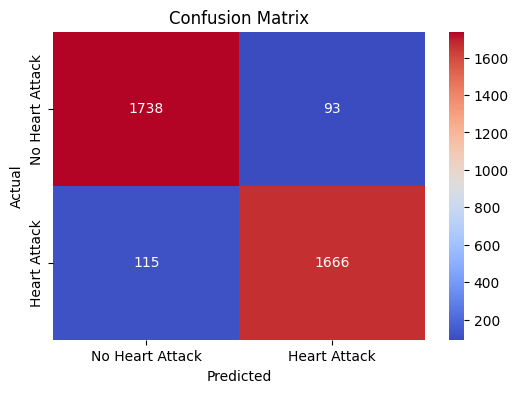


Confusion Matrix:
[[1738   93]
 [ 115 1666]]


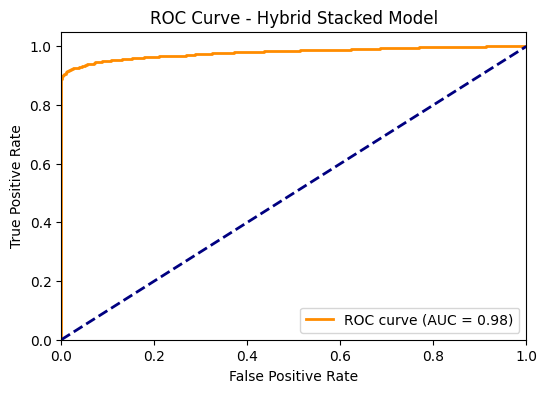


AUC Score: 0.98


In [18]:
# HYBRID STACKED MODEL LR+RF+XGB

# ✅ Install dependencies
!pip install xgboost imbalanced-learn seaborn

# ✅ Imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Load preprocessed dataset
df = pd.read_csv("/content/preprocessed_heart_attack.csv")
X = df.drop("Heart_Attack", axis=1)
y = df["Heart_Attack"]

# ✅ Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ✅ Define base learners
base_learners = [
    ('lr', LogisticRegression(max_iter=1000)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('xgb', XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42))
]

# ✅ Meta learner (Neural Network)
meta_learner = MLPClassifier(hidden_layer_sizes=(50, 25), max_iter=300, random_state=42)

# ✅ Create Stacking Classifier
stacked_model = StackingClassifier(
    estimators=base_learners,
    final_estimator=meta_learner,
    passthrough=True,  # include original features in meta model
    cv=5
)

# ✅ Train the hybrid model
stacked_model.fit(X_train, y_train)
y_pred = stacked_model.predict(X_test)

# ✅ Evaluate
acc = accuracy_score(y_test, y_pred) * 100
prec = precision_score(y_test, y_pred) * 100
rec = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print("\n🌟 Hybrid Stacked Model Evaluation")
print(f"Accuracy:  {acc:.2f}%")
print(f"Precision: {prec:.2f}%")
print(f"Recall:    {rec:.2f}%")
print(f"F1 Score:  {f1:.2f}%")

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm',
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nConfusion Matrix:")
print(cm)

from sklearn.metrics import roc_curve, roc_auc_score

# ✅ Get predicted probabilities for the positive class
y_prob = stacked_model.predict_proba(X_test)[:, 1]

# ✅ Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# ✅ Compute AUC
auc_score = roc_auc_score(y_test, y_prob)

# ✅ Plot ROC curve
plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # random classifier line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Hybrid Stacked Model')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC Score: {auc_score:.2f}")

from sklearn.model_selection import cross_val_score  # ✅ add this at the top with your imports







Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.5234 - loss: 0.6922 - val_accuracy: 0.5786 - val_loss: 0.6740
Epoch 2/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6086 - loss: 0.6597 - val_accuracy: 0.6467 - val_loss: 0.6303
Epoch 3/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.6601 - loss: 0.6153 - val_accuracy: 0.6822 - val_loss: 0.5987
Epoch 4/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7053 - loss: 0.5714 - val_accuracy: 0.7029 - val_loss: 0.5704
Epoch 5/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7419 - loss: 0.5336 - val_accuracy: 0.7428 - val_loss: 0.5239
Epoch 6/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.7698 - loss: 0.4978 - val_accuracy: 0.7710 - val_loss: 0.4951
Epoch 7/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7984 - loss: 0.4574 - val_accuracy: 0.7611 - val_loss: 0.5179
Epoch 8/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8117 - loss: 0.4268 - val_accuracy: 0.7907 - val_

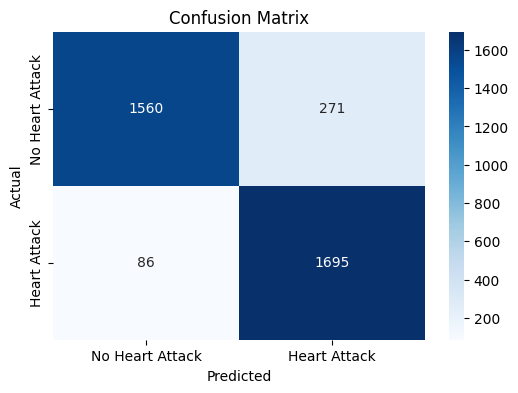


Confusion Matrix:
[[1560  271]
 [  86 1695]]


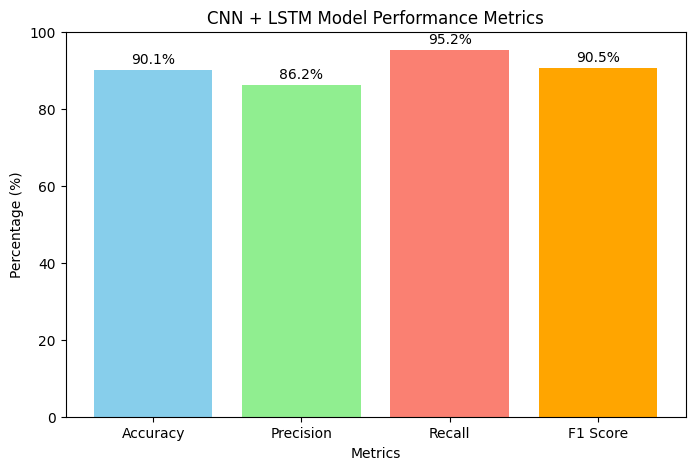

In [11]:
#CNN+LSTM

# ✅ Install dependencies
!pip install imbalanced-learn tensorflow scikit-learn pandas seaborn

# ✅ Imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Load preprocessed dataset
df = pd.read_csv("/content/preprocessed_heart_attack.csv")
X = df.drop("Heart_Attack", axis=1).values
y = df["Heart_Attack"].values

# ✅ Apply SMOTE to balance classes
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# ✅ Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

# ✅ Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ✅ Reshape for Conv1D (samples, timesteps, features)
X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# ✅ Define CNN + LSTM model
model = Sequential()
model.add(Conv1D(filters=64, kernel_size=1, activation='relu', input_shape=(1, X_train.shape[2])))
model.add(LSTM(64))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# ✅ Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# ✅ Train the model
model.fit(X_train, y_train, epochs=25, batch_size=32, validation_data=(X_test, y_test))

# ✅ Predictions
y_pred = (model.predict(X_test) > 0.5).astype(int)

# ✅ Metrics
acc = accuracy_score(y_test, y_pred) * 100
prec = precision_score(y_test, y_pred) * 100
rec = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print("\n🌟 CNN + LSTM Model Evaluation")
print(f"Accuracy:  {acc:.2f}%")
print(f"Precision: {prec:.2f}%")
print(f"Recall:    {rec:.2f}%")
print(f"F1 Score:  {f1:.2f}%")

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nConfusion Matrix:")
print(cm)

# ✅ Bar Chart of Metrics
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [acc, prec, rec, f1]  # already in percentages

plt.figure(figsize=(8, 5))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue', 'lightgreen', 'salmon', 'orange'])
plt.title('CNN + LSTM Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Percentage (%)')
plt.ylim(0, 100)

# Add the values on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=10)

plt.show()



Epoch 1/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 20s 29ms/step - accuracy: 0.5383 - loss: 0.6865
Epoch 2/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 13s 12ms/step - accuracy: 0.6413 - loss: 0.6367
Epoch 3/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6519 - loss: 0.6306
Epoch 4/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 10s 14ms/step - accuracy: 0.6643 - loss: 0.6169
Epoch 5/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 9s 12ms/step - accuracy: 0.6760 - loss: 0.6112
Epoch 6/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.6893 - loss: 0.5883
Epoch 7/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.7021 - loss: 0.5702
Epoch 8/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7234 - loss: 0.5480
Epoch 9/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 13s 29ms/step - accuracy: 0.7460 - loss: 0.5179
Epoch 10/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 12s 12ms/step - accuracy: 0.7485 - loss: 0.5075
Epoch 11/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 8s 17ms/step - accuracy: 0.7760 - loss: 0.4708
Epoch 12/25
452/452 ━━━━━━━━━━━━━━━━

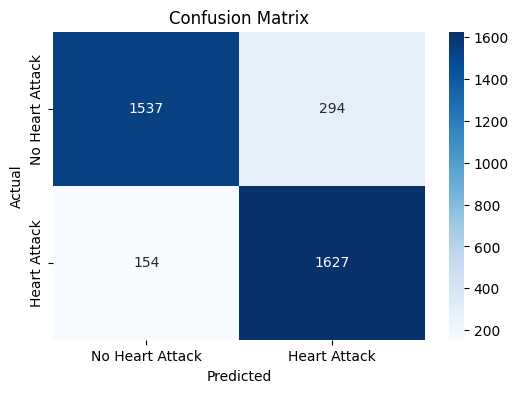


Confusion Matrix:
[[1537  294]
 [ 154 1627]]


In [ ]:
# CNN + BiGRU

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Dropout, Dense, Bidirectional, GRU
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
from tensorflow.keras.optimizers import Adam
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ✅ Fix shape issues
if len(X_train.shape) == 3 and X_train.shape[1] == 1:  # (samples, 1, features)
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[2], 1)  # (samples, timesteps=features, channels=1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[2], 1)
elif len(X_train.shape) == 2:  # (samples, features)
    X_train = np.expand_dims(X_train, axis=-1)  # (samples, timesteps=features, channels=1)
    X_test = np.expand_dims(X_test, axis=-1)

# 📌 CNN + BiGRU model
model = Sequential([
    Input(shape=(X_train.shape[1], X_train.shape[2])),
    Conv1D(filters=64, kernel_size=3, activation='relu'),
    MaxPooling1D(pool_size=2),
    Bidirectional(GRU(64)),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# ✅ Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# ✅ Train model
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# 🎯 Predictions
y_pred = (model.predict(X_test) > 0.5).astype("int32")

# ✅ Metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy:  {accuracy:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")

# ✅ Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nConfusion Matrix:")
print(cm)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5528 - loss: 0.6837
Epoch 2/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6576 - loss: 0.6241
Epoch 3/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7085 - loss: 0.5687
Epoch 4/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7504 - loss: 0.5188
Epoch 5/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7784 - loss: 0.4798
Epoch 6/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.7939 - loss: 0.4488
Epoch 7/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8132 - loss: 0.4089
Epoch 8/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8387 - loss: 0.3788
Epoch 9/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8456 - loss: 0.3478
Epoch 10/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8673 - loss: 0.3235
Epoch 11/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8780 - loss: 0.3000
Epoch 12/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step

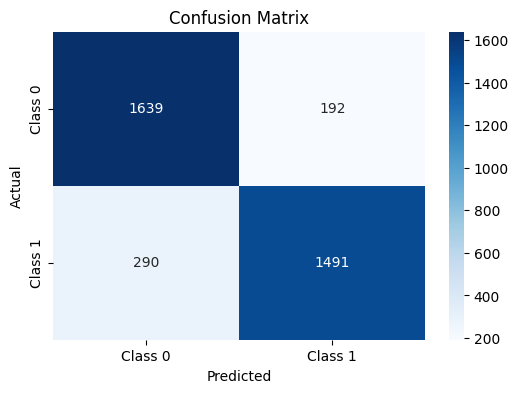


Confusion Matrix:
[[1639  192]
 [ 290 1491]]


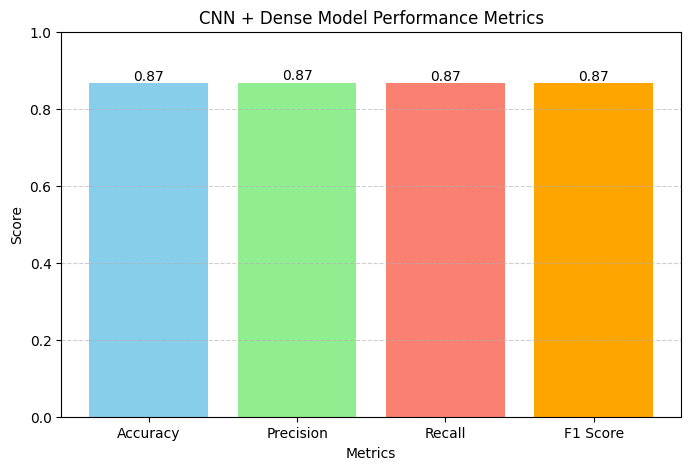

In [10]:
# CNN+DENSE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# ==== 0. Reshape input for Conv1D ====
# Conv1D expects 3D input: (samples, timesteps, features)
# We treat each feature as a "time step" with 1 feature per step
X_train_cnn = np.expand_dims(X_train, axis=-1)  # shape: (samples, features, 1)
X_test_cnn = np.expand_dims(X_test, axis=-1)

# ==== 1. CNN + Dense model ====
model = Sequential([
    Conv1D(64, kernel_size=3, activation='relu',
           input_shape=(X_train_cnn.shape[1], X_train_cnn.shape[2])),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(np.unique(y_train)), activation='softmax')  # Output layer for multi-class
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# ==== 2. Train ====
history = model.fit(X_train_cnn, y_train, epochs=25, batch_size=32, verbose=1)

# ==== 3. Predictions ====
y_pred_probs = model.predict(X_test_cnn)
y_pred = np.argmax(y_pred_probs, axis=1)

# ==== 4. Evaluation ====
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy:  {accuracy:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")

# ==== 5. Confusion Matrix ====
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=[f"Class {i}" for i in range(len(np.unique(y_train)))],
            yticklabels=[f"Class {i}" for i in range(len(np.unique(y_train)))])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nConfusion Matrix:")
print(cm)

# ==== 6. Bar Chart of Metrics ====
metrics_names = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
metrics_values = [accuracy, precision, recall, f1]

plt.figure(figsize=(8,5))
bars = plt.bar(metrics_names, metrics_values, color=['skyblue','lightgreen','salmon','orange'])
plt.title('CNN + Dense Model Performance Metrics')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.ylim(0,1)  # metrics are between 0 and 1
plt.bar_label(bars, fmt='%.2f', label_type='edge')  # show value on top of bar
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()



Epoch 1/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.2706 - mae: 0.4884 - val_loss: 0.2074 - val_mae: 0.4226
Epoch 2/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1918 - mae: 0.3983 - val_loss: 0.1821 - val_mae: 0.3744
Epoch 3/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.1580 - mae: 0.3468 - val_loss: 0.1483 - val_mae: 0.3314
Epoch 4/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1304 - mae: 0.3057 - val_loss: 0.1407 - val_mae: 0.3119
Epoch 5/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1172 - mae: 0.2823 - val_loss: 0.1386 - val_mae: 0.3004
Epoch 6/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1033 - mae: 0.2615 - val_loss: 0.1245 - val_mae: 0.2866
Epoch 7/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 0.0919 - mae: 0.2455 - val_loss: 0.1163 - val_mae: 0.2792
Epoch 8/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0843 - mae: 0.2323 - val_loss: 0.1234 - val_mae: 0.2742
Epoch 9/25
452/452 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

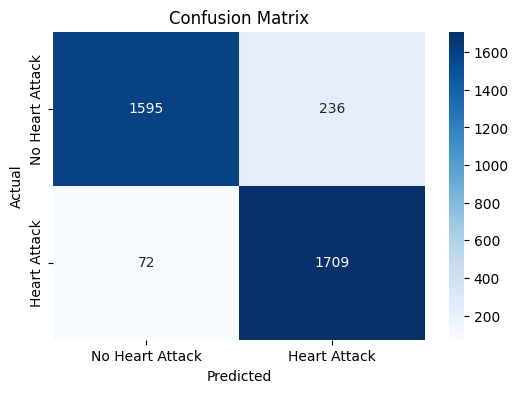


Confusion Matrix:
[[1595  236]
 [  72 1709]]


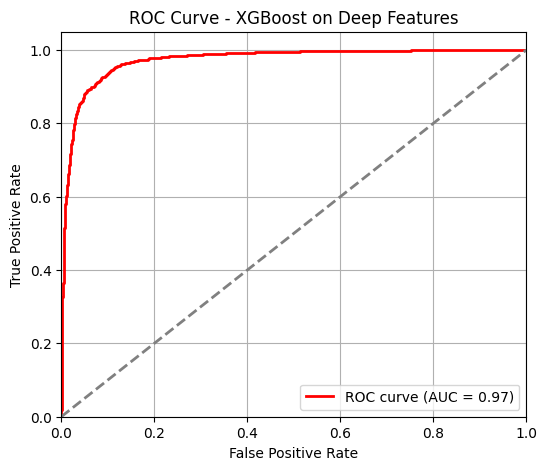

AUC-ROC: 0.9730


In [7]:
# XGB + DL FEATURES
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Input
import numpy as np
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# ==== 1. Scale data ====
scaler = StandardScaler()

# Convert to numpy arrays before reshape
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
X_test_np = X_test.values if hasattr(X_test, 'values') else X_test

# Flatten (reshape) for scaler
X_train_scaled = scaler.fit_transform(X_train_np.reshape(X_train_np.shape[0], -1))
X_test_scaled = scaler.transform(X_test_np.reshape(X_test_np.shape[0], -1))

# ==== 2. Build simple Dense feature extractor ====
input_layer = Input(shape=(X_train_scaled.shape[1],))
x = Dense(128, activation='relu')(input_layer)
x = Dense(64, activation='relu')(x)   # Last hidden layer (feature extractor)
output_layer = Dense(1)(x)  # Not used for XGBoost

feature_extractor_model = Model(inputs=input_layer, outputs=x)

# ==== 3. Compile and train only for representation learning ====
model_for_training = Model(inputs=input_layer, outputs=output_layer)
model_for_training.compile(optimizer='adam', loss='mse', metrics=['mae'])

model_for_training.fit(X_train_scaled, y_train,
                       epochs=25,
                       batch_size=32,
                       validation_data=(X_test_scaled, y_test))

# ==== 4. Extract deep features ====
train_features = feature_extractor_model.predict(X_train_scaled)
test_features = feature_extractor_model.predict(X_test_scaled)

# ==== 5. Train XGBoost on deep features ====
xgb_model = xgb.XGBRegressor(n_estimators=200, learning_rate=0.05, max_depth=6, random_state=42)
xgb_model.fit(train_features, y_train)

# ==== 6. Evaluate ====
y_pred = xgb_model.predict(test_features)
y_pred_class = (y_pred >= 0.5).astype(int)

mae = mean_absolute_error(y_test, y_pred)
print(f"Test MAE (XGBoost on DL features): {mae}")

accuracy = accuracy_score(y_test, y_pred_class)
f1 = f1_score(y_test, y_pred_class, average='weighted')
precision = precision_score(y_test, y_pred_class, average='weighted')
recall = recall_score(y_test, y_pred_class, average='weighted')

print(f"Accuracy:  {accuracy:.4f}")
print(f"F1 Score:  {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall:    {recall:.4f}")

# ==== 7. Confusion Matrix ====
cm = confusion_matrix(y_test, y_pred_class)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Heart Attack', 'Heart Attack'],
            yticklabels=['No Heart Attack', 'Heart Attack'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print("\nConfusion Matrix:")
print(cm)

# ==== 8. ROC-AUC Curve ====
from sklearn.metrics import roc_curve, auc

# Compute ROC curve and AUC using the predicted probabilities/values
fpr, tpr, thresholds = roc_curve(y_test, y_pred)  # y_pred is continuous
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='Red', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost on Deep Features')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

print(f"AUC-ROC: {roc_auc:.4f}")



Epoch 1/25


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9056 - loss: 0.3413
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9074 - loss: 0.3105
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9065 - loss: 0.3098
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - accuracy: 0.9121 - loss: 0.2975
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9035 - loss: 0.3177
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 32ms/step - accuracy: 0.9030 - loss: 0.3177
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9024 - loss: 0.3185
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 11s 27ms/step - accuracy: 0.9093 - loss: 0.3012
Epoch 9/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 7s 29ms/step - accuracy: 0.9079 - loss: 0.3047
Epoch 10/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 6s 22ms/step - accuracy: 0.9038 - loss: 0.3116
Epoch 11/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 22ms/step - accuracy: 0.9069 - loss: 0.3076
Epoch 12/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 11s 24

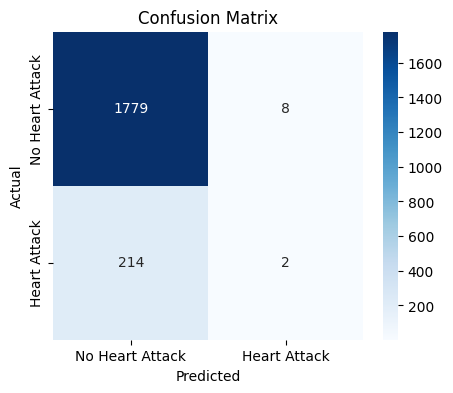

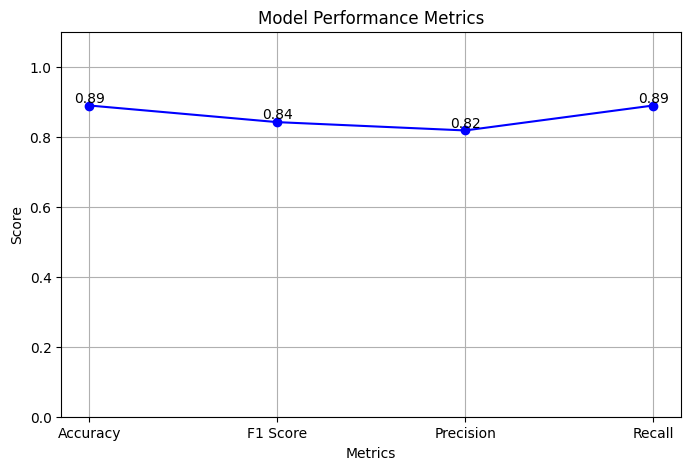

In [ ]:
# ===== Imports =====
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Bidirectional, LSTM, Dense

# ===== 1. Load Data =====
file_path = "/content/preprocessed_heart_attack.csv"
df = pd.read_csv(file_path)

# Features & Target
X = df.drop(columns=["Heart_Attack"]).values
y = df["Heart_Attack"].values

# ===== 2. Train-Test Split =====
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# ===== 3. Scale Features =====
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# ===== 4. Reshape for RNN =====
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# ===== 5. Build Model =====
model = Sequential([
    SimpleRNN(64, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Bidirectional(LSTM(64)),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ===== 6. Train =====
model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# ===== 7. Predict =====
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# ===== 8. Metrics =====
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='weighted')
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")

# ===== 9. Confusion Matrix =====
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["No Heart Attack", "Heart Attack"],
            yticklabels=["No Heart Attack", "Heart Attack"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# ===== 10. Line Chart of Metrics =====
metrics_names = ["Accuracy", "F1 Score", "Precision", "Recall"]
metrics_values = [accuracy, f1, precision, recall]

plt.figure(figsize=(8, 5))
plt.plot(metrics_names, metrics_values, marker='o', linestyle='-', color='blue')

# Annotate each point with the metric value
for i, val in enumerate(metrics_values):
    plt.text(i, val + 0.01, f"{val:.2f}", ha='center', fontsize=10)

plt.ylim(0, 1.1)  # Set y-axis limit for clarity
plt.title("Model Performance Metrics")
plt.xlabel("Metrics")
plt.ylabel("Score")
plt.grid(True)
plt.show()



<Figure size 1400x800 with 0 Axes>

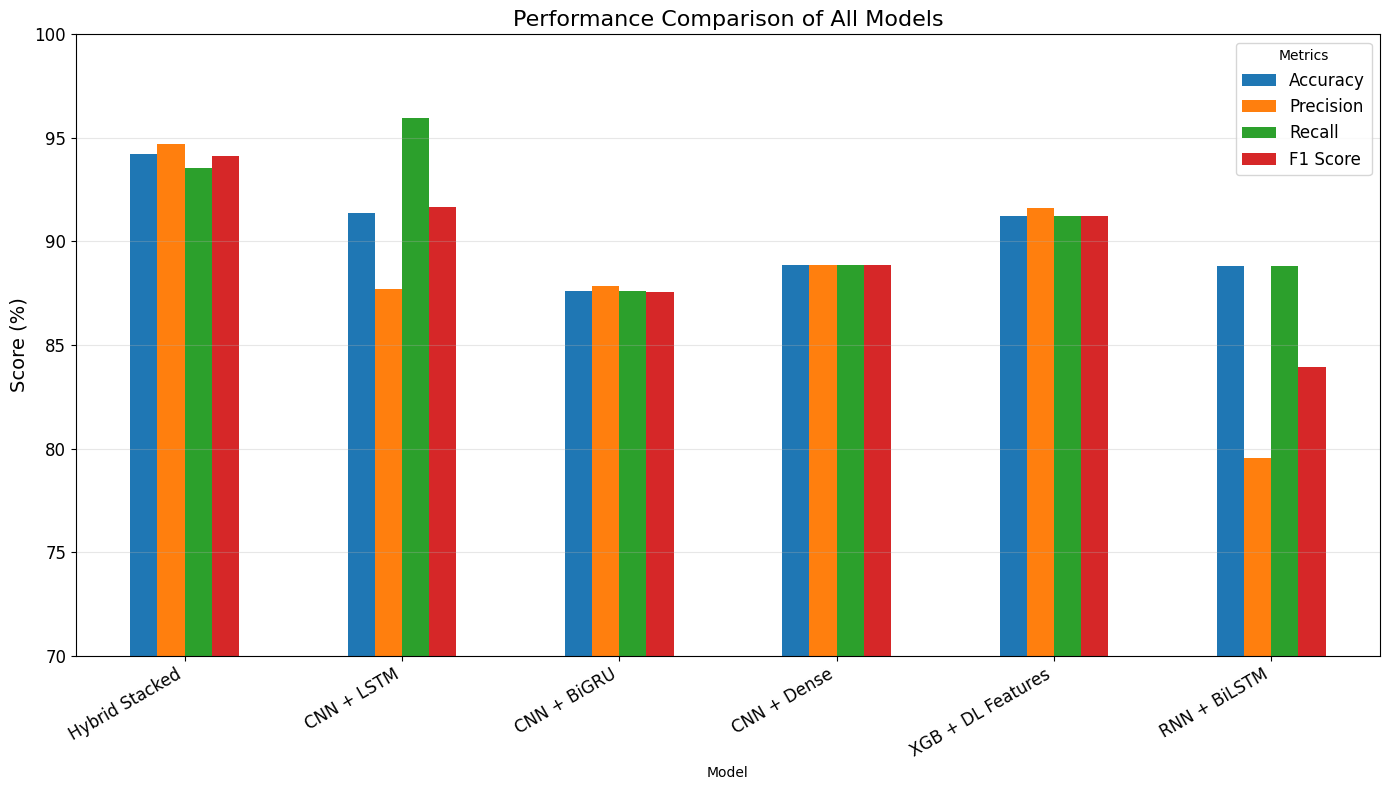

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ✅ Actual metrics from your results (converted all to %)
metrics_data = {
    'Model': [
        'Hybrid Stacked',
        'CNN + LSTM',
        'CNN + BiGRU',
        'CNN + Dense',
        'XGB + DL Features',
        'RNN + BiLSTM'
    ],
    'Accuracy': [
        94.24,
        91.36,
        87.60,
        88.84,
        91.22,
        88.82
    ],
    'Precision': [
        94.71,
        87.69,
        87.84,
        88.84,
        91.60,
        79.56
    ],
    'Recall': [
        93.54,
        95.96,
        87.60,
        88.84,
        91.22,
        88.82
    ],
    'F1 Score': [
        94.12,
        91.64,
        87.58,
        88.84,
        91.21,
        83.93
    ]
}

# ✅ Create DataFrame
metrics_df = pd.DataFrame(metrics_data)
metrics_df.set_index('Model', inplace=True)

# ✅ Plot Bar Chart
plt.figure(figsize=(14, 8))
metrics_df.plot(kind='bar', figsize=(14, 8))
plt.title('Performance Comparison of All Models', fontsize=16)
plt.ylabel('Score (%)', fontsize=14)
plt.xticks(rotation=30, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(70, 100)  # Since one model has Precision = 79.56
plt.legend(title='Metrics', fontsize=12)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()
